In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("/content/train_spaceshiptitanic.csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test = pd.read_csv("/content/test_spaceshiptitaic.csv")
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
train.shape

(8693, 14)

In [ ]:
test.shape

(4277, 13)

In [ ]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [ ]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
print("Percentage of Missing values")
(train.isnull().sum().sort_values(ascending = False)/train.shape[0])*100


Percentage of Missing values


CryoSleep       2.496261
ShoppingMall    2.392730
VIP             2.335212
HomePlanet      2.312205
Name            2.300702
Cabin           2.289198
VRDeck          2.162660
FoodCourt       2.105142
Spa             2.105142
Destination     2.093639
RoomService     2.082135
Age             2.059128
PassengerId     0.000000
Transported     0.000000
dtype: float64

In [ ]:
features_with_na = [features for features in train.columns if train[features].isnull().sum()>1]

# step 2 - To find out the percentage of missing values
for feature in features_with_na:
  print(feature, np.round(train[feature].isnull().mean(),4 ), " % missing values")

HomePlanet 0.0231  % missing values
CryoSleep 0.025  % missing values
Cabin 0.0229  % missing values
Destination 0.0209  % missing values
Age 0.0206  % missing values
VIP 0.0234  % missing values
RoomService 0.0208  % missing values
FoodCourt 0.0211  % missing values
ShoppingMall 0.0239  % missing values
Spa 0.0211  % missing values
VRDeck 0.0216  % missing values
Name 0.023  % missing values


In [ ]:
feature_with_na = [features for features in train.columns if train[features].isnull().sum()>1]
feature_with_na

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

<Axes: xlabel='Age', ylabel='Density'>

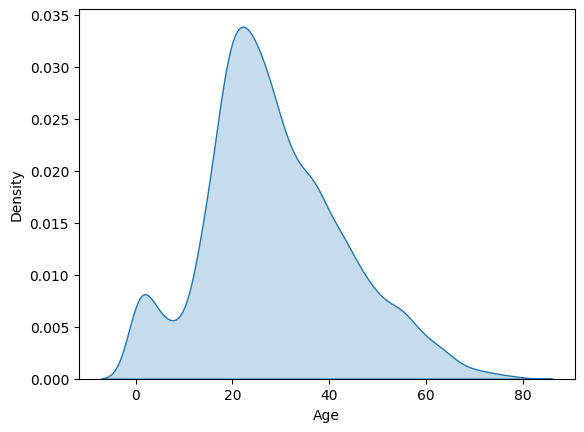

In [ ]:
sns.kdeplot(train.Age,fill = True)

In [ ]:
train['Age'].fillna(train['Age'].mean(),inplace = True)
test['Age'].fillna(test['Age'].mean(),inplace = True)

In [ ]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<Axes: xlabel='CryoSleep', ylabel='count'>

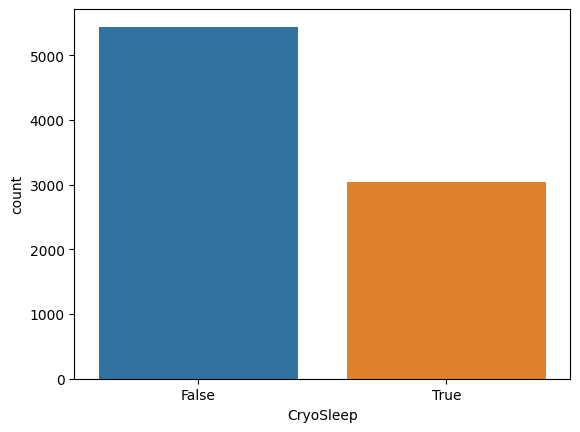

In [ ]:
sns.countplot(x = 'CryoSleep', data = train)

In [ ]:
train['Age'].fillna(train['Age'].mode())

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: float64

In [ ]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [ ]:
train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall','RoomService','Spa','VRDeck']] = train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall','RoomService','Spa','VRDeck']].fillna(value=0)
test[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall','RoomService','Spa','VRDeck']] = test[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall','RoomService','Spa','VRDeck']].fillna(value=0)

In [ ]:
#.fillna('False', inplace=True)
#test['CryoSleep'].fillna('False', inplace=True)

In [ ]:
train['CryoSleep'] = train['CryoSleep'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(int)

In [ ]:
train['VIP'] = train['VIP'].astype(int)
test['VIP'] = test['VIP'].astype(int)

In [ ]:
train['CryoSleep'].value_counts()

0    5656
1    3037
Name: CryoSleep, dtype: int64

In [ ]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [ ]:
train.drop(['PassengerId','Name'],axis = 1,inplace = True)
test.drop(['PassengerId','Name'],axis = 1,inplace = True)

In [ ]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True


In [ ]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [ ]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
train['HomePlanet'].fillna(method='bfill',inplace = True)
test['HomePlanet'].fillna(method='bfill',inplace = True)

In [ ]:
train['HomePlanet'].value_counts()

Earth     4697
Europa    2184
Mars      1812
Name: HomePlanet, dtype: int64

In [ ]:
train['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [ ]:
train.dropna(subset = ["Cabin"], inplace = True)
test.dropna(subset = ["Cabin"], inplace = True)

In [ ]:
train['Destination'].value_counts()

TRAPPIST-1e      5788
55 Cancri e      1750
PSO J318.5-22     778
Name: Destination, dtype: int64

In [ ]:
test['Destination'].fillna('TRAPPIST-1e' , inplace = True)
train['Destination'].fillna('TRAPPIST-1e' , inplace = True)

In [ ]:
train['Destination'].value_counts()

TRAPPIST-1e      5966
55 Cancri e      1750
PSO J318.5-22     778
Name: Destination, dtype: int64

In [ ]:
test.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [ ]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True


In [ ]:
train['Transported'] = train['Transported'].astype(int)

In [ ]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


<ipython-input-1161-8aa031602eeb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=None);


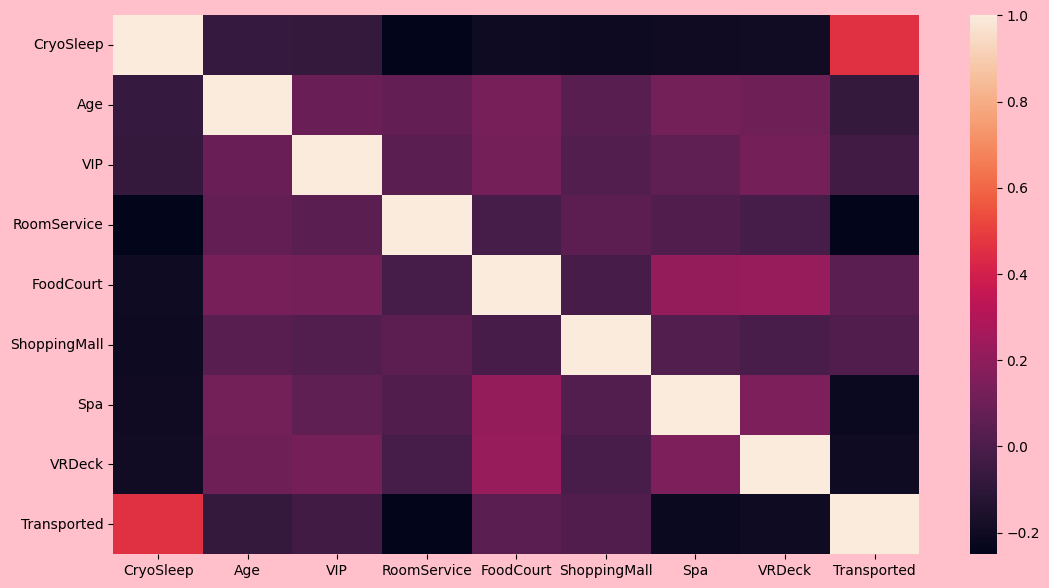

In [ ]:
plt.figure(figsize=(13,7),facecolor= 'pink')
sns.heatmap(train.corr(),annot=None);

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from re import L
from sklearn.preprocessing import LabelEncoder


In [ ]:
ct_train = ColumnTransformer(transformers = [('encoder', OneHotEncoder() , [0,3])],remainder ='passthrough')
ct_test = ColumnTransformer(transformers = [('encoder', OneHotEncoder() , [0,3])],remainder ='passthrough')
le1 = LabelEncoder()

In [ ]:
train.iloc[: ,2] = le1.fit_transform(train.iloc[: ,2])
test.iloc[: ,2] = le1.fit_transform(test.iloc[: ,2])

<ipython-input-1164-973933c8a4c8>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.iloc[: ,2] = le1.fit_transform(train.iloc[: ,2])
<ipython-input-1164-973933c8a4c8>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.iloc[: ,2] = le1.fit_transform(test.iloc[: ,2])


In [ ]:
xtrain = train.iloc[:,:-1].values
ytrain= train.iloc[:,-1].values

In [ ]:

xtrain = np.array(ct_train.fit_transform(xtrain))
test = np.array(ct_test.fit_transform(test))


In [ ]:
xtrain[1]

array([1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 2184, 24.0, 0, 109.0, 9.0, 25.0,
       549.0, 44.0], dtype=object)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(xtrain,ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predict = lr.predict(test)

In [ ]:
import numpy as np
import pandas as pd
prediction = pd.DataFrame(predict, test_id = 'index',columns=['Transported'])

TypeError: ignored

In [ ]:
prediction

In [ ]:
prediction['Transported'] = prediction['Transported'].astype(bool)

In [ ]:
prediction

In [ ]:
#.to_csv('prediction.csv')

In [ ]:
prediction.to_csv('submission.csv')

In [ ]:
df_submit = pd.DataFrame(data={'PassengerId': df_test.index, 'Transported': prediction})
df_submit.head()